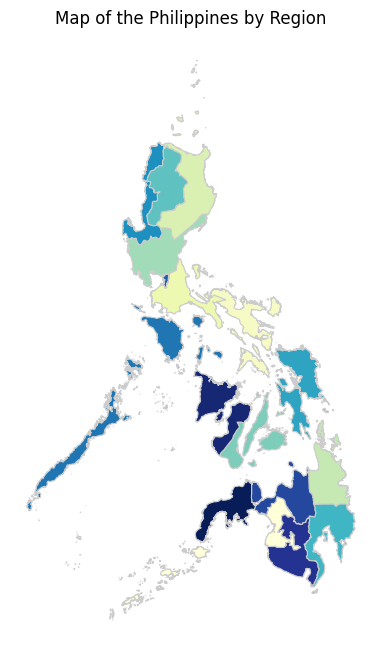

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

gdf = gpd.read_file('GeoJSON\Regions.shp')
df = pd.read_excel('consumerExpenditureHousing.xlsx')

df = df.T
df.columns = df.iloc[0]
df = df.iloc[1:]
df.index.name = 'Year'

df_provinces = df.columns.tolist()

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Map of the Philippines by Region')
ax.set_axis_off()

plt.show()


In [3]:
regions = df.columns.tolist()

gdf['REGION'] = regions
print(gdf['REGION'])

0     Autonomous in Muslim Mindanao
1                             Bicol
2                    Cagayan Valley
3                        Calabarzon
4                            Caraga
5                     Central Luzon
6                   Central Visayas
7         Cordillera Administrative
8                             Davao
9                   Eastern Visayas
10                           Ilocos
11                         Mimaropa
12                 National Capital
13                Northern Mindanao
14                     Soccsksargen
15                  Western Visayas
16              Zamboanga Peninsula
Name: REGION, dtype: object


In [4]:
df_long = df.melt(var_name='Region', value_name='Consumer_Housing_Expenditure', ignore_index=False).reset_index()

df_long = df_long.rename(columns={'index': 'Year'})

region_mean = df_long.groupby('Region')['Consumer_Housing_Expenditure'].mean()

print(region_mean)

Region
Autonomous in Muslim Mindanao          393.4
Bicol                             780.363636
Cagayan Valley                    729.672727
Calabarzon                       1470.363636
Caraga                            719.190909
Central Luzon                    1222.318182
Central Visayas                  1074.345455
Cordillera Administrative        1283.963636
Davao                             828.790909
Eastern Visayas                   710.690909
Ilocos                            890.027273
Mimaropa                          707.590909
National Capital                 2510.718182
Northern Mindanao                 785.436364
Soccsksargen                           654.2
Western Visayas                   844.463636
Zamboanga Peninsula               569.872727
Name: Consumer_Housing_Expenditure, dtype: object


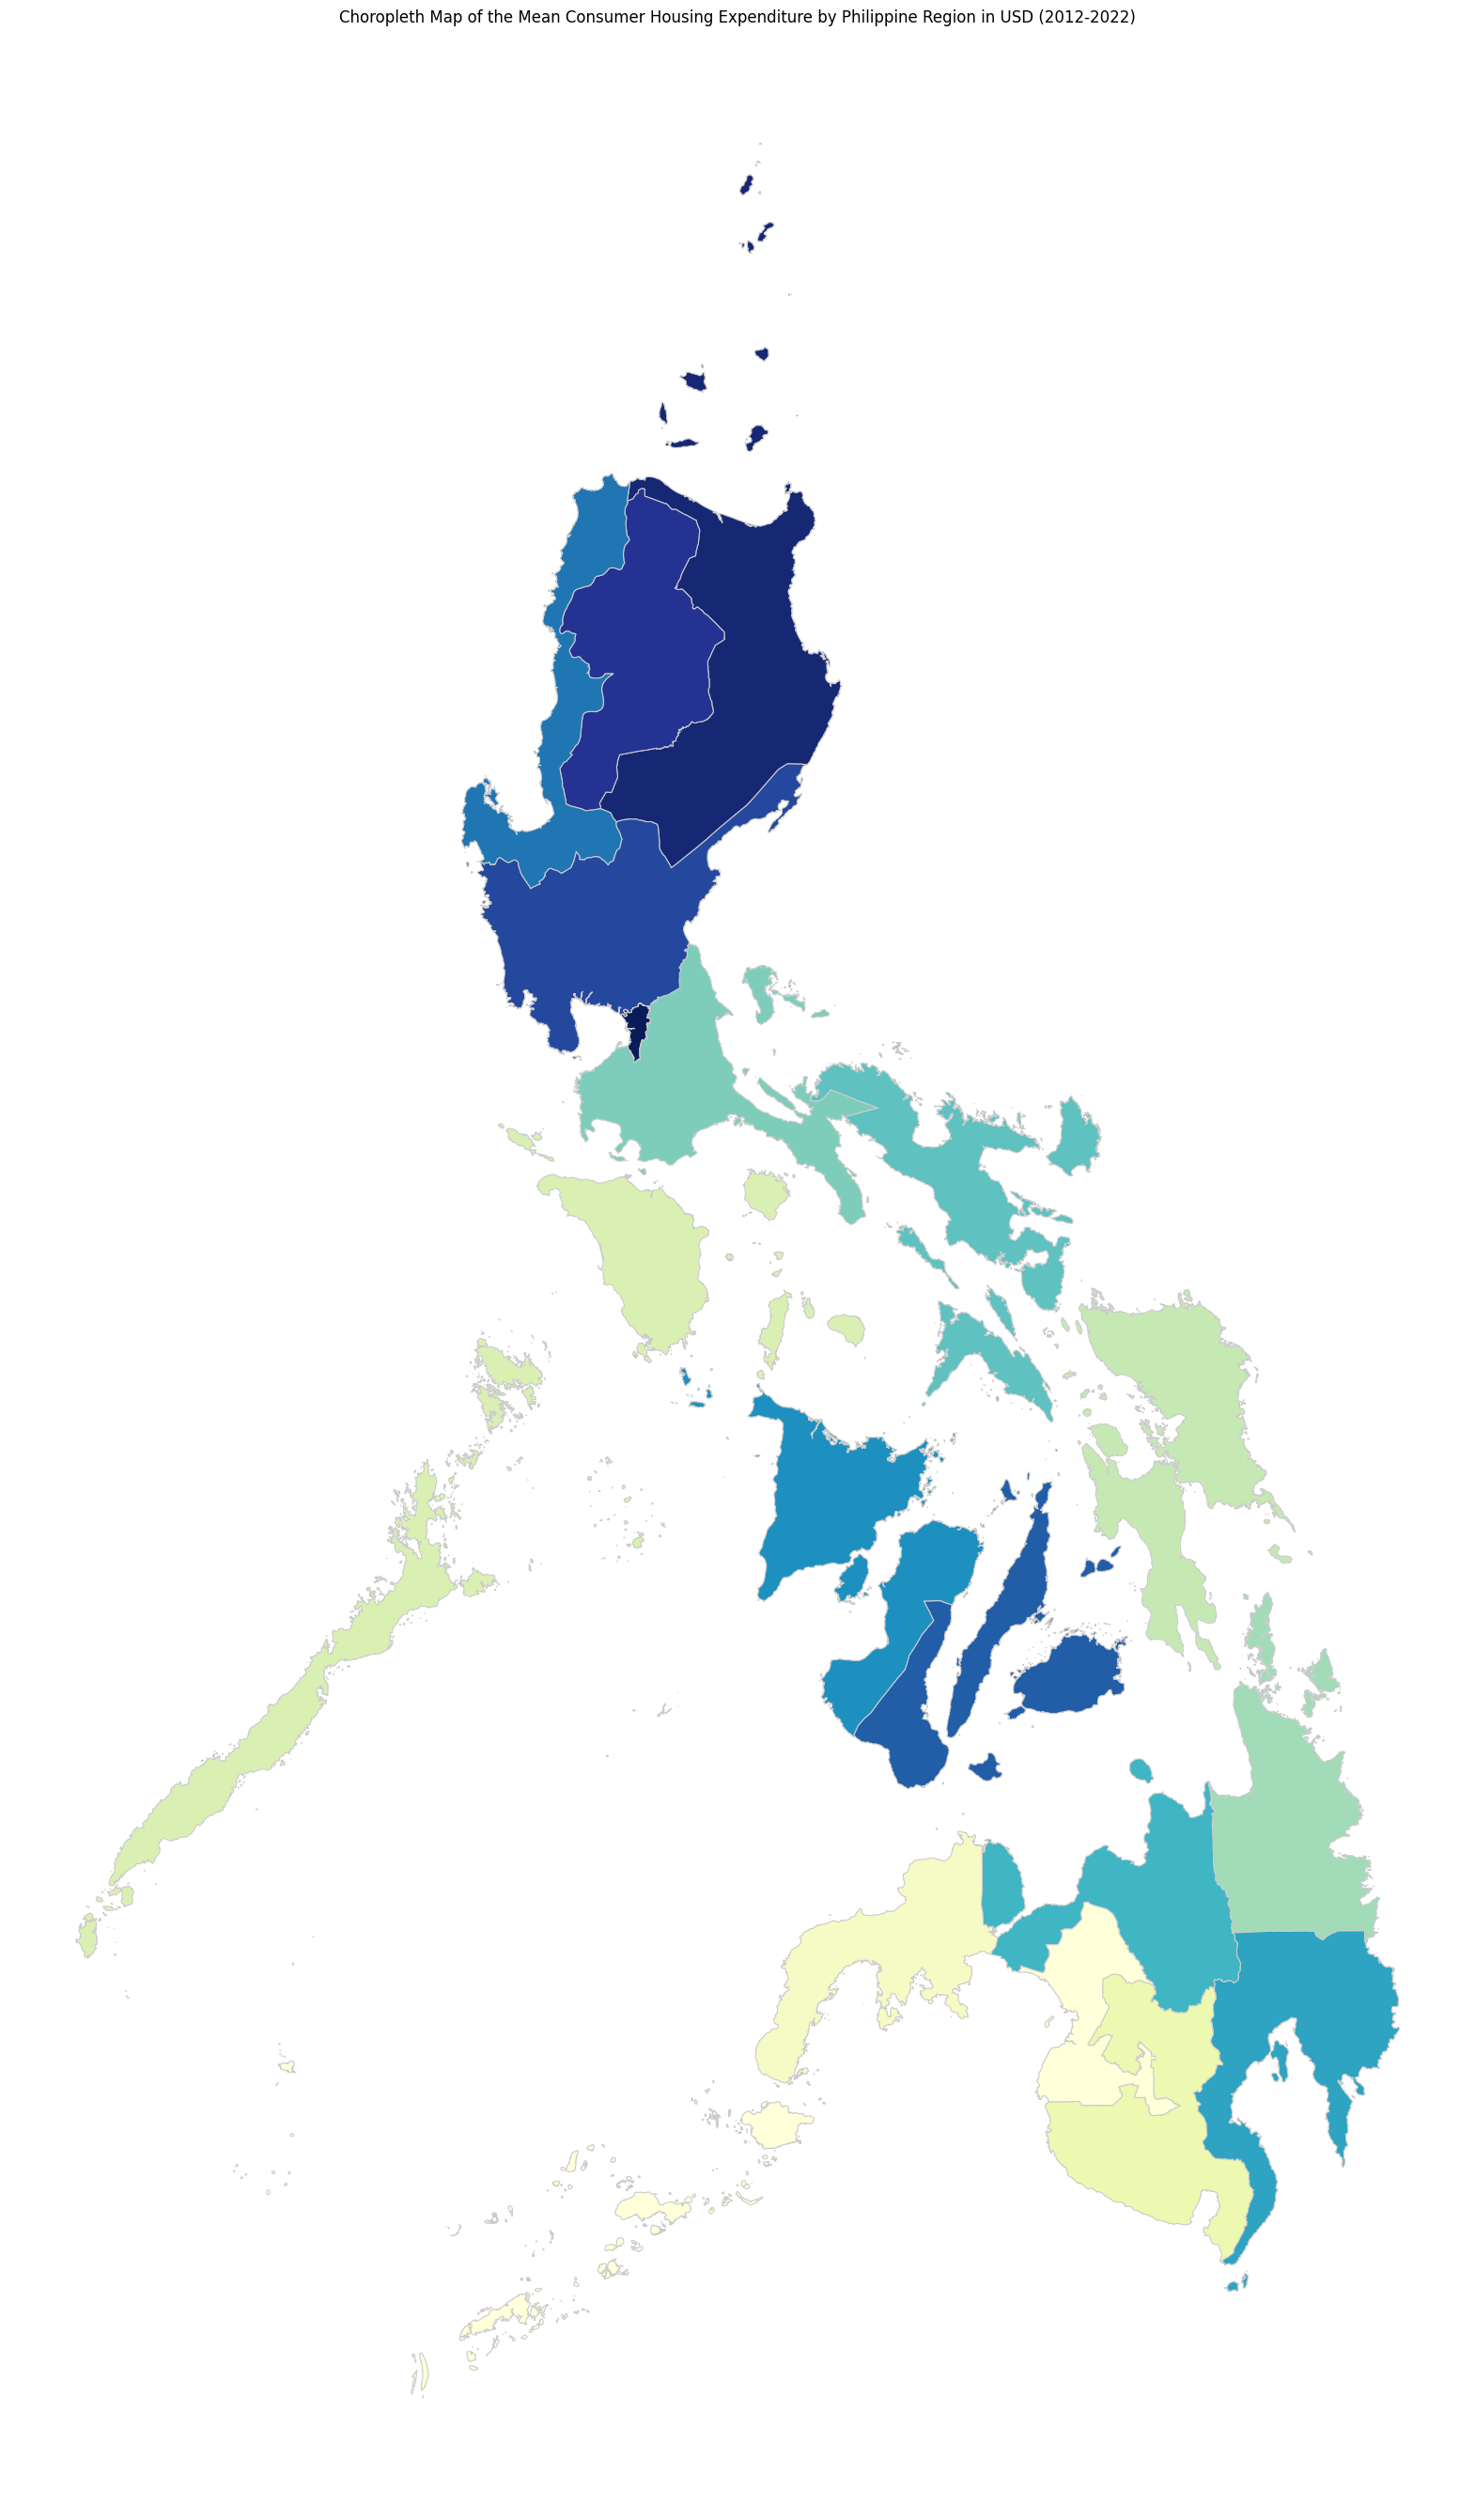

In [5]:
gdf_merged = gdf.merge(region_mean, left_on='REGION', right_on='Region')

fig, ax = plt.subplots(1, 1, figsize=(20, 35))
gdf_merged.plot(column='Consumer_Housing_Expenditure', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)
    
ax.set_title('Choropleth Map of the Mean Consumer Housing Expenditure by Philippine Region in USD (2012-2022)')
ax.set_axis_off()

plt.show()

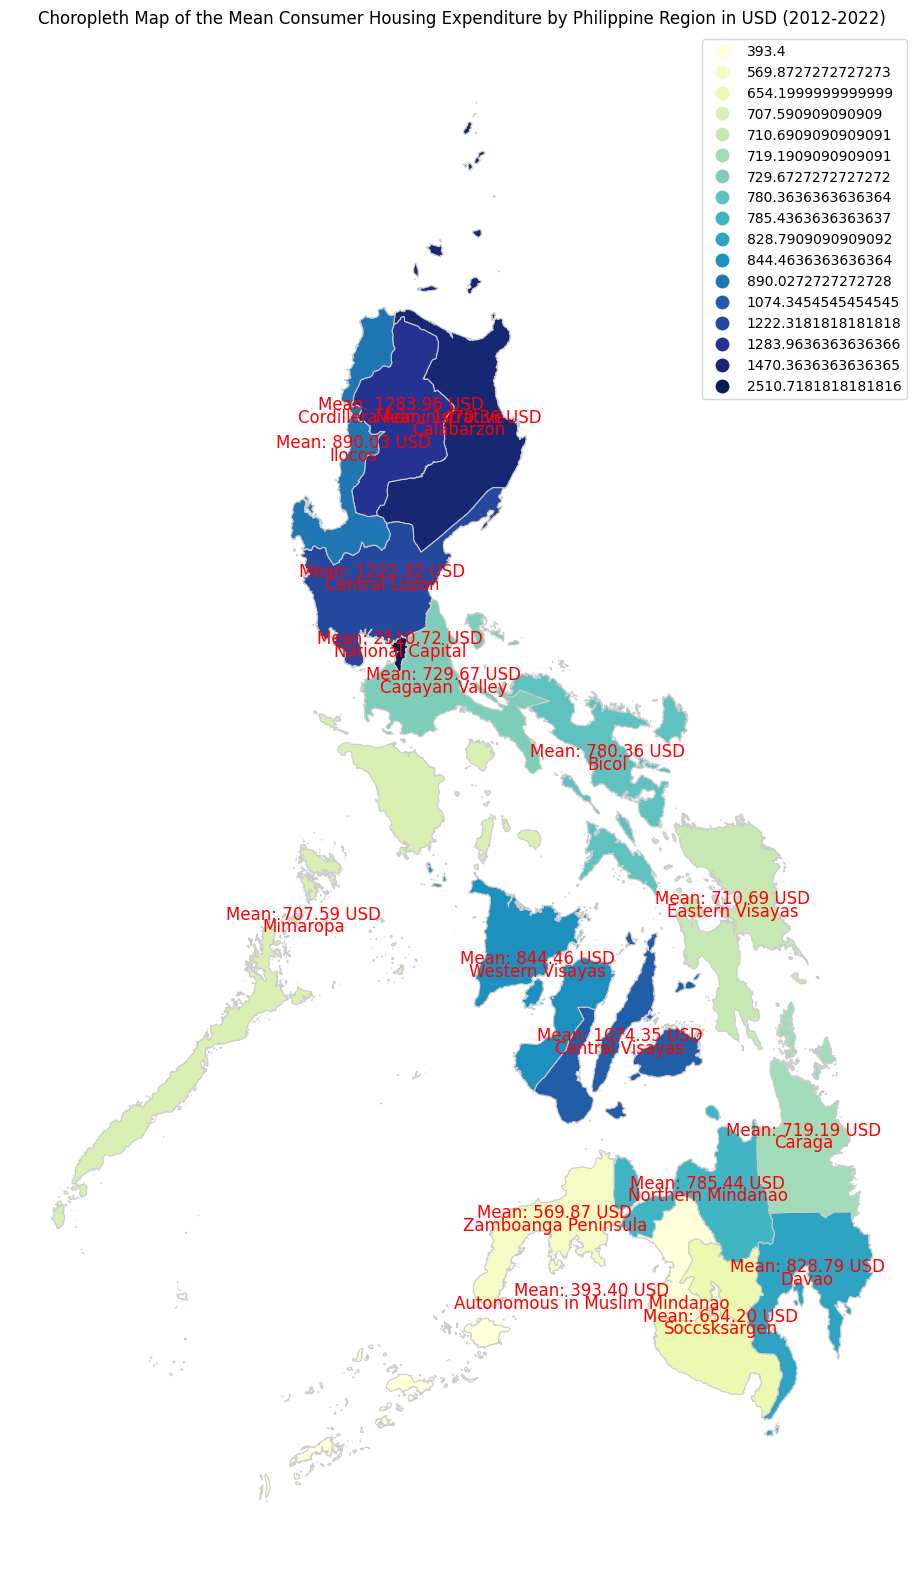

In [6]:
gdf_merged = gdf.merge(region_mean, left_on='REGION', right_on='Region')

fig, ax = plt.subplots(1, 1, figsize=(15, 20))
gdf_merged.plot(column='Consumer_Housing_Expenditure', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for x, y, label, mean_value in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged['REGION'], gdf_merged['Consumer_Housing_Expenditure']):
    ax.text(x, y, label, fontsize=12, ha='center', va='center', color='red')
    ax.text(x, y + 0.15, f'Mean: {mean_value:.2f} USD', fontsize=12, ha='center', va='center', color='red')
    
ax.set_title('Choropleth Map of the Mean Consumer Housing Expenditure by Philippine Region in USD (2012-2022)')
ax.set_axis_off()

plt.show()

In [7]:
mean_values = region_mean.astype(float).round(2)

print(mean_values)

Region
Autonomous in Muslim Mindanao     393.40
Bicol                             780.36
Cagayan Valley                    729.67
Calabarzon                       1470.36
Caraga                            719.19
Central Luzon                    1222.32
Central Visayas                  1074.35
Cordillera Administrative        1283.96
Davao                             828.79
Eastern Visayas                   710.69
Ilocos                            890.03
Mimaropa                          707.59
National Capital                 2510.72
Northern Mindanao                 785.44
Soccsksargen                      654.20
Western Visayas                   844.46
Zamboanga Peninsula               569.87
Name: Consumer_Housing_Expenditure, dtype: float64


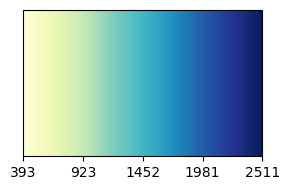

In [8]:
import matplotlib.colors as mcolors
import numpy as np

cmap = plt.get_cmap('YlGnBu')
norm = mcolors.Normalize(vmin=393.40, vmax=2510.72)

fig, ax = plt.subplots(figsize=(3, 2)) 

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  

cbar = plt.colorbar(sm, cax=ax, orientation='horizontal')

cbar.set_ticks(np.linspace(393.40, 2510.72, num=5))

plt.tight_layout()
plt.show()

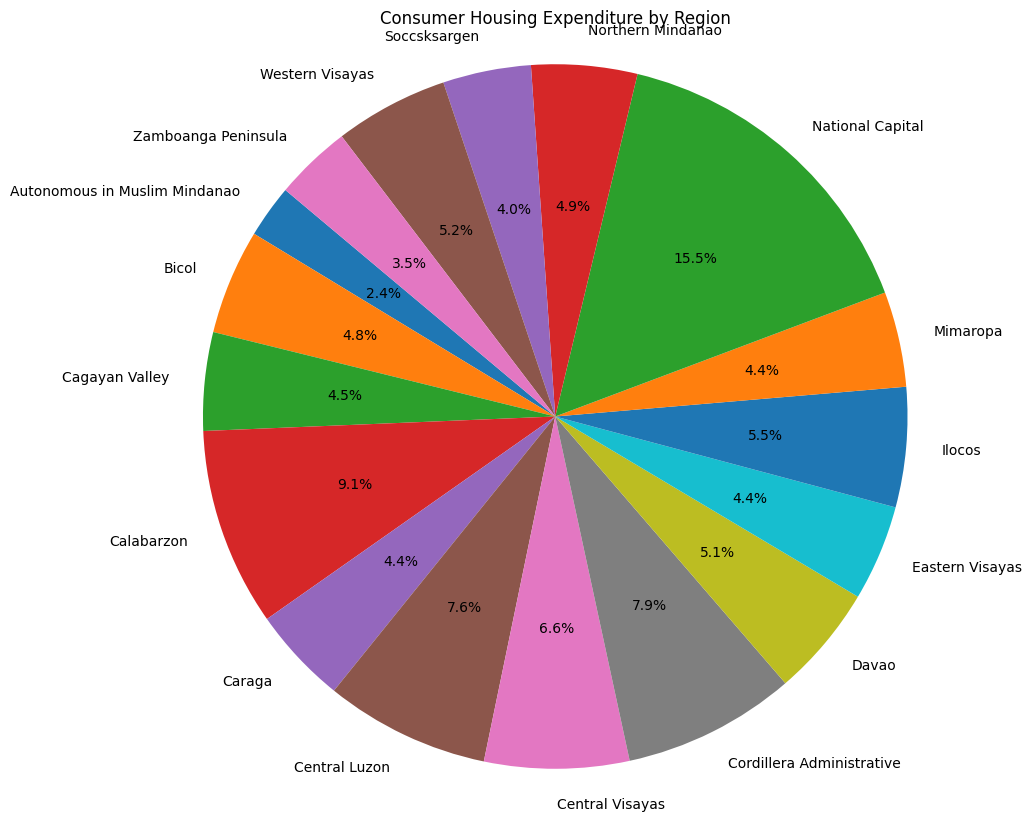

In [9]:
plt.figure(figsize=(10, 10))
plt.pie(mean_values, labels=regions, autopct='%1.1f%%', startangle=140)

plt.title("Consumer Housing Expenditure by Region")

plt.axis('equal')  
plt.show()